# **Weather AUS Model**


### 1- Import & Display dataset
***

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', 200)

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

from pathlib import Path
import os

In [99]:
script_folder = Path(os.getcwd())
dataset_folder = script_folder.parent / "data"

print("Code Location: ", script_folder)
print("Dataset Location: ", dataset_folder)

Code Location:  d:\Coding\Jupyter\Weather-AUS\RandomForest
Dataset Location:  d:\Coding\Jupyter\Weather-AUS\data


In [100]:
df = pd.read_csv(dataset_folder / "weatherAUS.csv")
print(f"Original shape: {df.shape}")
df.head()

Original shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [102]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [103]:
df.isnull().sum().sort_values(ascending=False)

Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
Temp9am           1767
WindSpeed9am      1767
MinTemp           1485
MaxTemp           1261
Location             0
Date                 0
dtype: int64

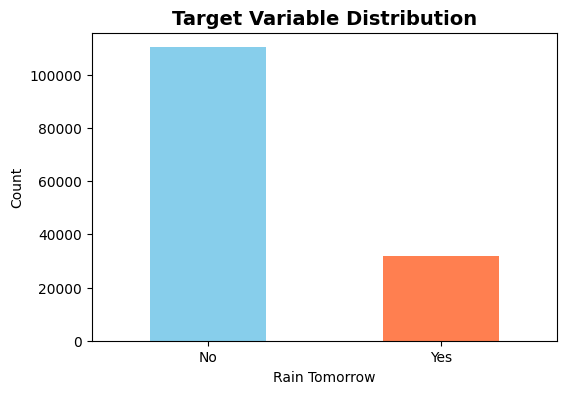

In [104]:
def plot_target_distribution():
    plt.figure(figsize=(6,4))
    df['RainTomorrow'].value_counts().plot(
        kind='bar', color=['skyblue', 'coral']
    )
    plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Rain Tomorrow')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()
    
plot_target_distribution()

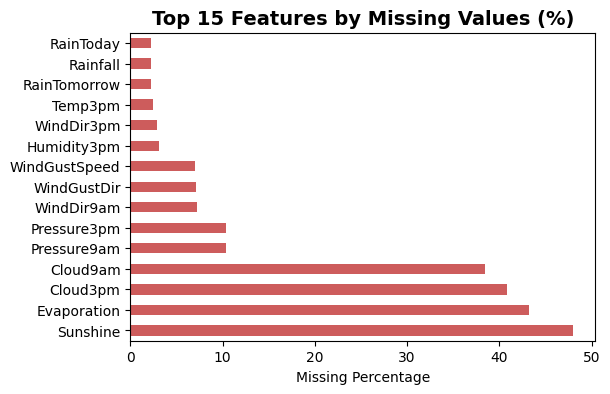

In [105]:
def plot_missing_values():
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(15)

    plt.figure(figsize=(6,4))
    missing_pct.plot(kind='barh', color='indianred')
    plt.title('Top 15 Features by Missing Values (%)', fontsize=14, fontweight='bold')
    plt.xlabel('Missing Percentage')
    plt.show()

plot_missing_values()

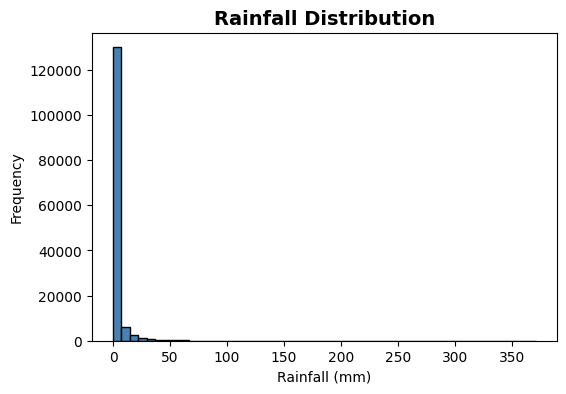

In [106]:
def plot_rainfall_distribution():
    plt.figure(figsize=(6,4))
    df['Rainfall'].plot(
        kind='hist', bins=50, color='steelblue', edgecolor='black'
    )
    plt.title('Rainfall Distribution', fontsize=14, fontweight='bold')
    plt.xlabel('Rainfall (mm)')
    plt.ylabel('Frequency')
    plt.show()
    
plot_rainfall_distribution()

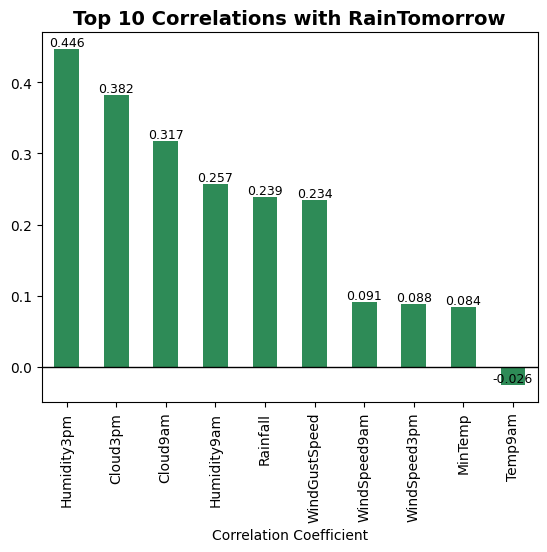

In [107]:
def plot_top_correlations():
    df_temp = df.copy()
    df_temp['RainTomorrow'] = df_temp['RainTomorrow'].map({'Yes': 1, 'No': 0})
    numeric_cols = df_temp.select_dtypes(include=[np.number]).columns
    corr_sample = (
        df_temp[numeric_cols]
        .corr()['RainTomorrow']
        .drop('RainTomorrow') 
        .dropna()
        .sort_values(ascending=False)
        .head(10)
    )
    graph = corr_sample.plot(kind='bar', color='seagreen')

    for p in graph.patches:
        height = p.get_height() # type: ignore
        graph.text(
            p.get_x() + p.get_width() / 2, # type: ignore
            height,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=9
        )

    plt.axhline(0, color='black', linewidth=1)
    plt.title('Top 10 Correlations with RainTomorrow', fontsize=14, fontweight='bold')
    plt.xlabel('Correlation Coefficient')
    plt.show()
    
plot_top_correlations()

### 2- Data Preprocessing
***

In [108]:
df = df.drop(columns=["Evaporation", "Sunshine"])

target_col = "RainTomorrow"
df = df.dropna(subset=[target_col])

In [109]:
numerical_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### 3- Feature Engineering
***

In [110]:
print(df.shape)

(142193, 21)


In [111]:
# create Year, Month, Day, DayOfWeek and dropped Date col
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df = df.drop(columns=['Date'])

In [112]:
# create Temp range and average
df['TempRange'] = df['MaxTemp'] - df['MinTemp']
df['AvgTemp'] = (df['MaxTemp'] + df['MinTemp']) / 2

In [113]:
# create Pressure change
df['PressureChange'] = df['Pressure9am'] - df['Pressure3pm']

In [114]:
# create Humidity change
df['HumidityChange'] = df['Humidity3pm'] - df['Humidity9am']

In [115]:
# create wind speed change
df['WindSpeedChange'] = df['WindSpeed3pm'] - df['WindSpeed9am']

In [116]:
print(df.shape)

(142193, 29)


In [117]:
numerical_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes(include='object').columns)
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'DayOfWeek', 'TempRange', 'AvgTemp', 'PressureChange', 'HumidityChange', 'WindSpeedChange']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### 4- Handling Outliers
***

In [118]:
def remove_outliers_iqr(df):
    print("Old Shape:", df.shape)
    for col in numerical_cols:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        lower = np.where(df[col] <= lower_bound)[0]
        upper = np.where(df[col] >= upper_bound)[0]

        df = df.drop(index=lower)
        df = df.drop(index=upper)
        
    print("New Shape:", df.shape)
    return df

df = remove_outliers_iqr(df)

Old Shape: (142193, 29)
New Shape: (142193, 29)


### 5- Data-Target Split
***

In [119]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [120]:
numerical_cols = list(X.select_dtypes(include=np.number).columns)
categorical_cols = list(X.select_dtypes(include='object').columns)
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'DayOfWeek', 'TempRange', 'AvgTemp', 'PressureChange', 'HumidityChange', 'WindSpeedChange']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### 6 - Encoding
***

##### Identify Columns

In [121]:
categorical_binary_cols = [col for col in categorical_cols if X[col].nunique() == 2]
categorical_multi_class_cols = [col for col in categorical_cols if X[col].nunique() > 2]

print(categorical_binary_cols)
print(categorical_multi_class_cols)

['RainToday']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


##### Encode Target

In [122]:
print(y[5:10])

5     No
6     No
7     No
8    Yes
9     No
Name: RainTomorrow, dtype: object


In [123]:
le_target = LabelEncoder()
y = le_target.fit_transform(y)

In [124]:
print(y[5:10]) # type: ignore

[0 0 0 1 0]


#### Define Encoding, NAN, Scaling Pipeline
***

In [125]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

multiclass_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('Numerical Preprocessing', numerical_transformer, numerical_cols),
    ('Categorical Binary Preprocessing', binary_transformer, categorical_binary_cols),
    ('Categorical Multi-Class Preprocessing', multiclass_transformer, categorical_multi_class_cols)
])

### 7- Train-Test Split
***

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train Records:",X_train.shape[0])
print("Test Records:",X_test.shape[0])

Train Records: 113754
Test Records: 28439


### 8- Apply Pipeline and PCA
***

##### Apply Pipeline

In [127]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test) 
#TODO: Remove the following comment
# fit_transform(): Learns parameters from the training set and transforms X_train
# fit():           Uses the same parameters learned from training to transform X_test

In [128]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
print(X_train_df.shape)
X_train_df.head()

(113754, 28)


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,DayOfWeek,TempRange,AvgTemp,PressureChange,HumidityChange,WindSpeedChange
103642,Nuriootpa,19.3,34.8,0.0,SE,56.0,ESE,SSE,15.0,7.0,52.0,20.0,1013.4,1010.6,3.0,3.0,24.3,33.6,No,2012,1,25,2,15.5,27.05,2.8,-32.0,-8.0
18697,NorahHead,NaN,NaN,0.2,S,39.0,W,S,11.0,22.0,NaN,NaN,1020.5,1019.0,NaN,NaN,NaN,NaN,No,2010,8,6,4,NaN,NaN,1.5,NaN,11.0
99305,Adelaide,13.0,23.4,0.0,WSW,43.0,NW,SW,2.0,22.0,64.0,44.0,1012.5,1010.4,NaN,NaN,16.4,23.1,No,2016,11,30,2,10.4,18.20,2.1,-20.0,20.0
142981,Katherine,25.0,33.4,0.0,NW,63.0,N,NW,19.0,26.0,75.0,54.0,1004.3,1001.2,6.0,4.0,29.4,33.0,No,2015,1,7,2,8.4,29.20,3.1,-21.0,7.0
85572,Brisbane,15.3,25.8,0.0,E,30.0,SE,E,9.0,13.0,58.0,45.0,1024.9,1021.2,7.0,2.0,21.3,24.2,No,2012,11,12,0,10.5,20.55,3.7,-13.0,4.0


In [129]:
X_train_processed_df = pd.DataFrame(X_train_processed, columns=preprocessor.get_feature_names_out()) #type:ignore
print(X_train_processed_df.shape)
X_train_processed_df.head()

(113754, 117)


,Numerical Preprocessing__MinTemp,Numerical Preprocessing__MaxTemp,Numerical Preprocessing__Rainfall,Numerical Preprocessing__WindGustSpeed,Numerical Preprocessing__WindSpeed9am,Numerical Preprocessing__WindSpeed3pm,Numerical Preprocessing__Humidity9am,Numerical Preprocessing__Humidity3pm,Numerical Preprocessing__Pressure9am,Numerical Preprocessing__Pressure3pm,Numerical Preprocessing__Cloud9am,Numerical Preprocessing__Cloud3pm,Numerical Preprocessing__Temp9am,Numerical Preprocessing__Temp3pm,Numerical Preprocessing__Year,Numerical Preprocessing__Month,Numerical Preprocessing__Day,Numerical Preprocessing__DayOfWeek,Numerical Preprocessing__TempRange,Numerical Preprocessing__AvgTemp,Numerical Preprocessing__PressureChange,Numerical Preprocessing__HumidityChange,Numerical Preprocessing__WindSpeedChange,Categorical Binary Preprocessing__RainToday,Categorical Multi-Class Preprocessing__Location_Albany,Categorical Multi-Class Preprocessing__Location_Albury,Categorical Multi-Class Preprocessing__Location_AliceSprings,Categorical Multi-Class Preprocessing__Location_BadgerysCreek,Categorical Multi-Class Preprocessing__Location_Ballarat,Categorical Multi-Class Preprocessing__Location_Bendigo,Categorical Multi-Class Preprocessing__Location_Brisbane,Categorical Multi-Class Preprocessing__Location_Cairns,Categorical Multi-Class Preprocessing__Location_Canberra,Categorical Multi-Class Preprocessing__Location_Cobar,Categorical Multi-Class Preprocessing__Location_CoffsHarbour,Categorical Multi-Class Preprocessing__Location_Dartmoor,Categorical Multi-Class Preprocessing__Location_Darwin,Categorical Multi-Class Preprocessing__Location_GoldCoast,Categorical Multi-Class Preprocessing__Location_Hobart,Categorical Multi-Class Preprocessing__Location_Katherine,Categorical Multi-Class Preprocessing__Location_Launceston,Categorical Multi-Class Preprocessing__Location_Melbourne,Categorical Multi-Class Preprocessing__Location_MelbourneAirport,Categorical Multi-Class Preprocessing__Location_Mildura,Categorical Multi-Class Preprocessing__Location_Moree,Categorical Multi-Class Preprocessing__Location_MountGambier,Categorical Multi-Class Preprocessing__Location_MountGinini,Categorical Multi-Class Preprocessing__Location_Newcastle,Categorical Multi-Class Preprocessing__Location_Nhil,Categorical Multi-Class Preprocessing__Location_NorahHead,Categorical Multi-Class Preprocessing__Location_NorfolkIsland,Categorical Multi-Class Preprocessing__Location_Nuriootpa,Categorical Multi-Class Preprocessing__Location_PearceRAAF,Categorical Multi-Class Preprocessing__Location_Penrith,Categorical Multi-Class Preprocessing__Location_Perth,Categorical Multi-Class Preprocessing__Location_PerthAirport,Categorical Multi-Class Preprocessing__Location_Portland,Categorical Multi-Class Preprocessing__Location_Richmond,Categorical Multi-Class Preprocessing__Location_Sale,Categorical Multi-Class Preprocessing__Location_SalmonGums,Categorical Multi-Class Preprocessing__Location_Sydney,Categorical Multi-Class Preprocessing__Location_SydneyAirport,Categorical Multi-Class Preprocessing__Location_Townsville,Categorical Multi-Class Preprocessing__Location_Tuggeranong,Categorical Multi-Class Preprocessing__Location_Uluru,Categorical Multi-Class Preprocessing__Location_WaggaWagga,Categorical Multi-Class Preprocessing__Location_Walpole,Categorical Multi-Class Preprocessing__Location_Watsonia,Categorical Multi-Class Preprocessing__Location_Williamtown,Categorical Multi-Class Preprocessing__Location_Witchcliffe,Categorical Multi-Class Preprocessing__Location_Wollongong,Categorical Multi-Class Preprocessing__Location_Woomera,Categorical Multi-Class Preprocessing__WindGustDir_ENE,Categorical Multi-Class Preprocessing__WindGustDir_ESE,Categorical Multi-Class Preprocessing__WindGustDir_N,Categorical Multi-Class Preprocessing__WindGustDir_NE,Categorical Multi-Class Preprocessing__WindGustDir_NNE,Categorical Multi-Class Preprocessing__WindGustDir_NNW,Categorical Multi-Class Preprocessing__WindGustDi

##### Apply PCA

In [130]:
pca = PCA(n_components=0.95)  # Retain 95% variance

In [131]:
print("Before: ", X_train_processed.shape[1])

X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

print("After: ", X_train_pca.shape[1])

Before:  117
After:  50


### 9- Model Pipeline with GridSearch
***

In [132]:
models_dir = Path("Models")

def save_model(model, model_file: str):
    filepath = models_dir / model_file
    print("Model saved as ", model_file)
    joblib.dump(model, filepath)

def load_model(model_file: str):
    filepath = models_dir / model_file
    if filepath.exists():
        model = joblib.load(filepath)
        print(model_file, " Model loaded")
        return model
    print("Model not found")
    return None

#### Random Forest

In [138]:
best_random_forest = load_model("best_random_forest.pkl")

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=8))
])

rf_param_grid = {
    'classifier__n_estimators': [400],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [3, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__max_features': ['sqrt', 'log2']
}

rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=3
)

if best_random_forest == None:
    rf_grid_search.fit(X_train, y_train)
    best_random_forest = rf_grid_search.best_estimator_
    save_model(best_random_forest, "best_random_forest.pkl")


Model not found
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=400;, score=0.847 total time= 1.0min
[CV 2/3] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=400;, score=0.845 total time= 1.0min
[CV 3/3] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=3, classifier__n_estimators=400;, score=0.849 total time= 1.2min
[CV 1/3] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples_split=5, classifier__n_estimators=400;, score=0.846 total time= 1.1min
[CV 2/3] END classifier__max_depth=None, classifier__max_features=sqrt, classifier__min_samples_leaf=1, classifier__min_samples

#### Gradient Boost

In [141]:
best_gradient_boost = load_model("best_gradient_boost.pkl")
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_param_grid = {
    'classifier__n_estimators': [250],
    'classifier__learning_rate': [0.03],
    'classifier__max_depth': [5, 7],
    'classifier__min_samples_split': [2, 4],
    'classifier__min_samples_leaf': [3, 4],
    'classifier__subsample': [0.7, 0.8]
}

gb_grid_search = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=3
)

if best_gradient_boost == None:
    gb_grid_search.fit(X_train, y_train)
    best_gradient_boost = gb_grid_search.best_estimator_
    save_model(best_gradient_boost, "best_gradient_boost.pkl")
    

Model not found
Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END classifier__learning_rate=0.03, classifier__max_depth=5, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=250, classifier__subsample=0.7;, score=0.847 total time= 7.9min
[CV 2/3] END classifier__learning_rate=0.03, classifier__max_depth=5, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=250, classifier__subsample=0.7;, score=0.847 total time= 7.7min
[CV 3/3] END classifier__learning_rate=0.03, classifier__max_depth=5, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=250, classifier__subsample=0.7;, score=0.850 total time= 7.5min
[CV 1/3] END classifier__learning_rate=0.03, classifier__max_depth=5, classifier__min_samples_leaf=3, classifier__min_samples_split=2, classifier__n_estimators=250, classifier__subsample=0.8;, score=0.847 total time= 8.5min
[CV 2/3] END classifier__le

#### XGB Boost

In [142]:
best_xgb_boost = load_model("best_xgb_boost.pkl")
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', XGBClassifier(random_state=42, n_jobs=8, eval_metric='logloss'))
])

xgb_param_grid = {
    'classifier__n_estimators': [200, 250],
    'classifier__max_depth': [6, 8],
    'classifier__learning_rate': [0.04, 0.06, 0.08],
    'classifier__subsample': [0.85, 0.9],
    'classifier__colsample_bytree': [0.8, 0.85],
    'classifier__gamma': [0.2, 0.25, 0.3],
    'classifier__min_child_weight': [1, 2]
}

xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=3
)

if best_xgb_boost == None:
    xgb_grid_search.fit(X_train, y_train)
    best_xgb_boost = xgb_grid_search.best_estimator_
    save_model(best_xgb_boost, "best_xgb_boost.pkl")
    

Model not found
Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV 1/3] END classifier__colsample_bytree=0.8, classifier__gamma=0.2, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=200, classifier__subsample=0.85;, score=0.849 total time=   2.2s
[CV 2/3] END classifier__colsample_bytree=0.8, classifier__gamma=0.2, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=200, classifier__subsample=0.85;, score=0.849 total time=   2.3s
[CV 3/3] END classifier__colsample_bytree=0.8, classifier__gamma=0.2, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_estimators=200, classifier__subsample=0.85;, score=0.851 total time=   2.1s
[CV 1/3] END classifier__colsample_bytree=0.8, classifier__gamma=0.2, classifier__learning_rate=0.04, classifier__max_depth=6, classifier__min_child_weight=1, classifier__n_e

#### Multi-Layer Perceptron (NN)

In [ ]:
best_mlp = load_model("best_mlp.pkl")

mlp_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', pca),
    ('classifier', MLPClassifier(random_state=42, max_iter=1000, early_stopping=True))
])

mlp_param_grid = {
    'classifier__hidden_layer_sizes': [(130, 89), (100, 50), (150, 100), (200,)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__alpha': [0.001, 0.005, 0.01],
    'classifier__learning_rate': ['adaptive', 'constant'],
    'classifier__solver': ['adam']
}

mlp_grid_search = GridSearchCV(
    mlp_pipeline,
    mlp_param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=1,
    verbose=3
)

if best_mlp == None:
    mlp_grid_search.fit(X_train, y_train)
    best_mlp = mlp_grid_search.best_estimator_
    save_model(best_mlp, "best_mlp.pkl")


Model not found
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV 1/3] END classifier__activation=tanh, classifier__alpha=0.001, classifier__hidden_layer_sizes=(130, 89), classifier__learning_rate=adaptive, classifier__solver=adam;, score=0.851 total time=  21.2s
[CV 2/3] END classifier__activation=tanh, classifier__alpha=0.001, classifier__hidden_layer_sizes=(130, 89), classifier__learning_rate=adaptive, classifier__solver=adam;, score=0.845 total time=  28.8s
[CV 3/3] END classifier__activation=tanh, classifier__alpha=0.001, classifier__hidden_layer_sizes=(130, 89), classifier__learning_rate=adaptive, classifier__solver=adam;, score=0.855 total time=  21.8s
[CV 1/3] END classifier__activation=tanh, classifier__alpha=0.001, classifier__hidden_layer_sizes=(130, 89), classifier__learning_rate=constant, classifier__solver=adam;, score=0.851 total time=  21.2s
[CV 2/3] END classifier__activation=tanh, classifier__alpha=0.001, classifier__hidden_layer_sizes=(130, 89), class

In [156]:
print("RF: ",rf_grid_search.best_params_)
print("GB: ",gb_grid_search.best_params_)
print("XBG: ",xgb_grid_search.best_params_)
print("MLP: ",mlp_grid_search.best_params_)

RF:  {'classifier__max_depth': None, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 400}
GB:  {'classifier__learning_rate': 0.03, 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 250, 'classifier__subsample': 0.7}
XBG:  {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0.25, 'classifier__learning_rate': 0.06, 'classifier__max_depth': 8, 'classifier__min_child_weight': 1, 'classifier__n_estimators': 250, 'classifier__subsample': 0.85}
MLP:  {'classifier__activation': 'tanh', 'classifier__alpha': 0.01, 'classifier__hidden_layer_sizes': (100, 50), 'classifier__learning_rate': 'adaptive', 'classifier__solver': 'adam'}


### 10- Model Evaluation
***

In [144]:
def evaluate_model(model, model_name):
    print(model_name)
    y_pred = model.predict(X_test)
    
    print("Test Accuracy:")
    print(accuracy_score(y_test, y_pred))
    
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=le_target.classes_))
    
    print("Confussion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le_target.classes_, yticklabels=le_target.classes_) #type:ignore
    plt.show()

Random Forest
Test Accuracy:
0.8510496149653645
Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.96      0.91     22064
         Yes       0.77      0.48      0.59      6375

    accuracy                           0.85     28439
   macro avg       0.82      0.72      0.75     28439
weighted avg       0.84      0.85      0.84     28439

Confussion Matrix:


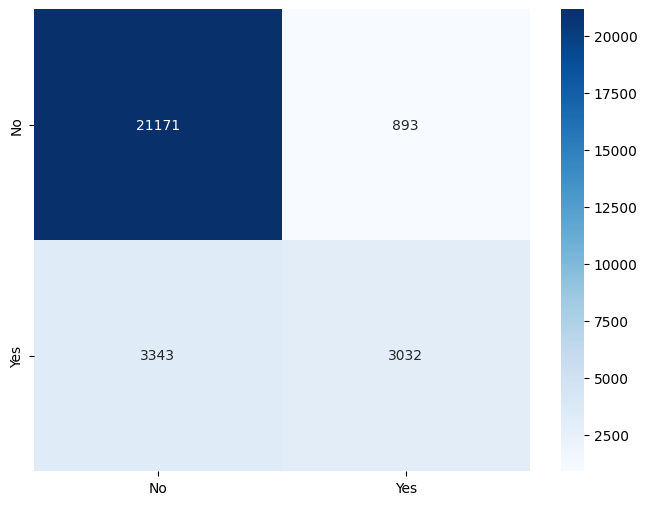

In [145]:
evaluate_model(best_random_forest, "Random Forest")

Gradient Boosting
Test Accuracy:
0.852245156299448
Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22064
         Yes       0.74      0.52      0.61      6375

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439

Confussion Matrix:


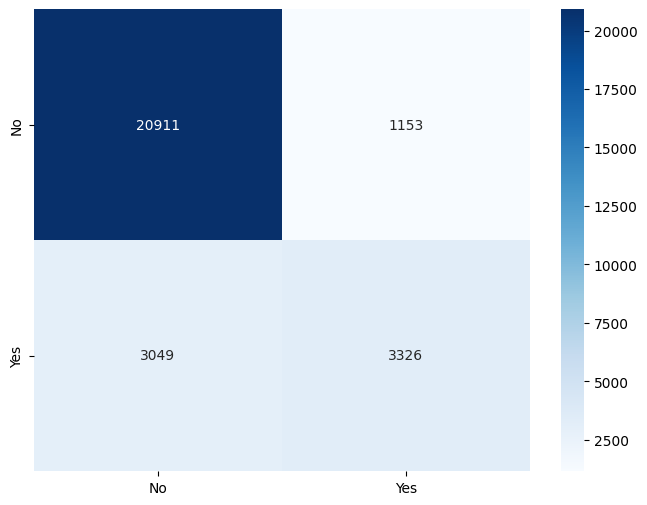

In [146]:
evaluate_model(best_gradient_boost, "Gradient Boosting")

XGBoost
Test Accuracy:
0.8544252610851296
Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.95      0.91     22064
         Yes       0.75      0.53      0.62      6375

    accuracy                           0.85     28439
   macro avg       0.81      0.74      0.77     28439
weighted avg       0.85      0.85      0.85     28439

Confussion Matrix:


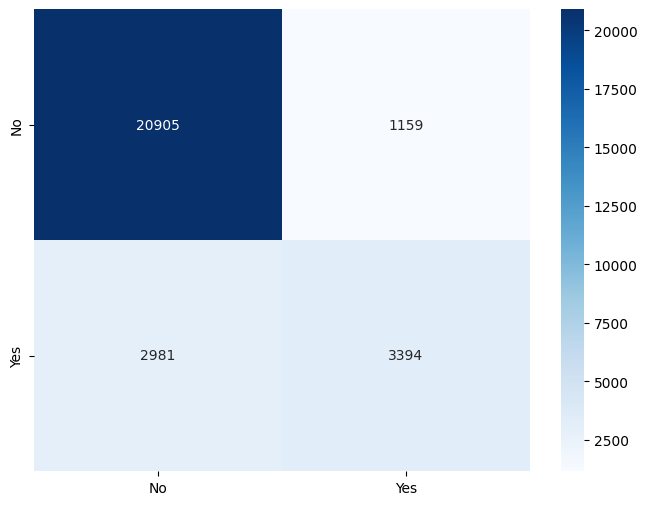

In [147]:
evaluate_model(best_xgb_boost, "XGBoost")

Neural Network
Test Accuracy:
0.8538978163789163
Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.94      0.91     22064
         Yes       0.73      0.56      0.63      6375

    accuracy                           0.85     28439
   macro avg       0.80      0.75      0.77     28439
weighted avg       0.85      0.85      0.85     28439

Confussion Matrix:


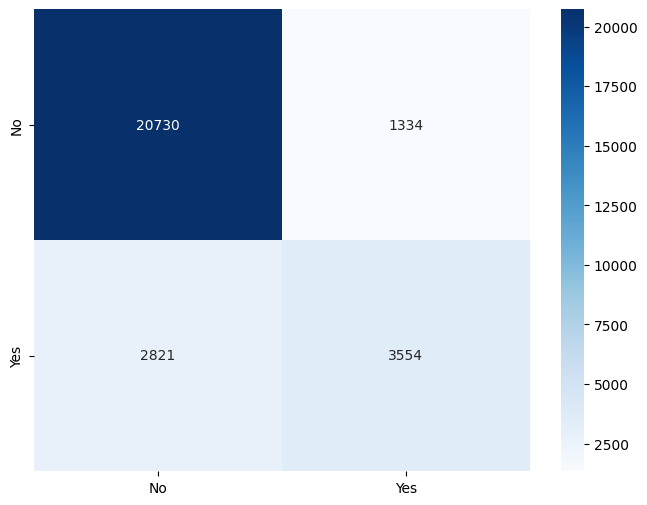

In [148]:
evaluate_model(best_mlp, "Neural Network")

### 11- Ensemble Learning
***

In [154]:
model_list = [
    best_random_forest,
    best_gradient_boost,
    best_xgb_boost,
    best_mlp,
]

preds_all = np.array([model.predict(X_test) for model in model_list]) #type:ignore

hard_preds = stats.mode(preds_all, axis=0, keepdims=False)[0]

hard_acc = accuracy_score(y_test, hard_preds)
hard_acc

0.8533352086922887